<a href="https://colab.research.google.com/github/rdemarqui/Data-Science-Basico/blob/master/Audio_transcription%20v0.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attendance transcription

This code have tree parts:


In [ ]:
!pip install -q pydub

## Obtaining audio

In [ ]:
import time

In [ ]:
import os
path = os.getcwd()
path

'/content'

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  path = '/content/drive/MyDrive/Colab Notebooks/'
  sound_file = os.path.join(path, '_1_1_2023267550902.wav')
except:
  from google.colab import files
  path = '/content/'
  saund_file = os.path.join(path, '_1_1_2023267550902.wav')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Playing audio

In [ ]:
from pydub import AudioSegment
from pydub.playback import play

In [ ]:
sound = AudioSegment.from_wav(sound_file)

In [ ]:
# Playing audio
sound

## Plot Audio Signal

In [ ]:
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_signal(audiofile):
  # Read the Audiofile
  samplerate, data = read(audiofile)
  # Frame rate for the Audio
  print(f'Sample rate: {samplerate}')

  # Duration of the audio in Seconds
  duration = len(data)/samplerate
  print("Duration of Audio in Seconds:", duration)
  print("Duration of Audio in Minutes", round(duration/60),2)

  time = np.arange(0,duration,1/samplerate)

  # Plotting the Graph using Matplotlib
  plt.plot(time/60, data)
  plt.xlabel('Time [m]')
  plt.ylabel('Amplitude')
  plt.title('Audio')
  plt.show()

  return duration

Sample rate: 8000
Duration of Audio in Seconds: 2067.461
Duration of Audio in Minutes 34 2


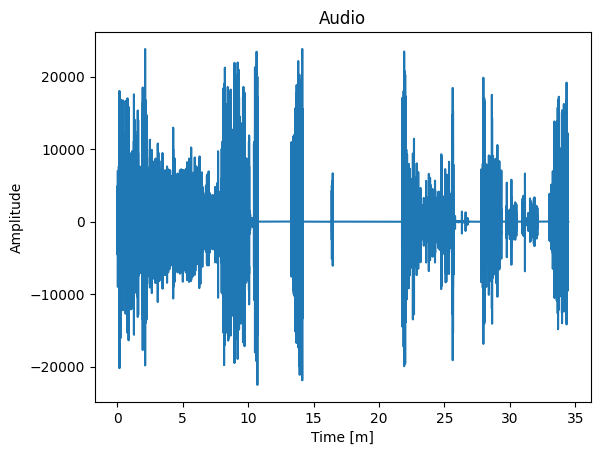

In [ ]:
full_audio = plot_signal(sound_file)

## Cutting periods of silence

* https://onkar-patil.medium.com/how-to-remove-silence-from-an-audio-using-python-50fd2c00557d
* https://ngbala6.medium.com/audio-processing-and-remove-silence-using-python-a7fe1552007a

### Splitting audio file

In [ ]:
if not os.path.isdir("splitaudio"):
  os.mkdir("splitaudio")

audio = AudioSegment.from_file(sound_file)
lengthaudio = len(audio)
print("Length of Audio File", lengthaudio)

start = 0
# In Milliseconds, this will cut 10 min of audio
threshold = 600000
end = 0
counter = 0

while start < len(audio):
    end += threshold
    print(start , end)
    chunk = audio[start:end]
    filename = f'splitaudio/chunk{counter}.wav'
    chunk.export(filename, format="wav")
    counter +=1
    start += threshold

Length of Audio File 2067461
0 600000
600000 1200000
1200000 1800000
1800000 2400000


## Transcribing the attendance

For this we will use the Whisper package, provided by OpenAI.

Documentation: https://github.com/openai/whisper

In [ ]:
!pip install -q git+https://github.com/openai/whisper.git 

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.8 MB/s eta 0:00:00


In [ ]:
import whisper

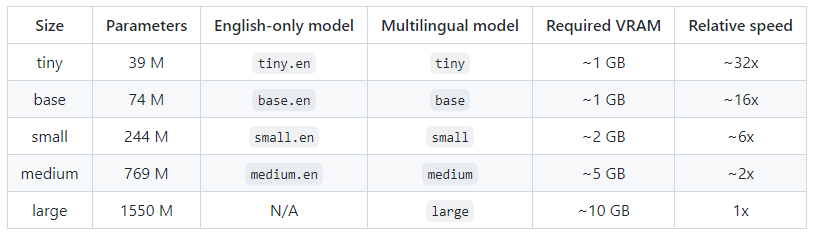

In [ ]:
# Loading trained model
model = whisper.load_model("large")

100%|█████████████████████████████████████| 2.87G/2.87G [00:48<00:00, 63.1MiB/s]


In [ ]:
%%time
# Running transcription
result_vanila = model.transcribe(sound_file)

CPU times: user 7min 29s, sys: 4.65 s, total: 7min 34s
Wall time: 7min 43s


In [ ]:
%%time
# Running transcription
#result_pt = model.transcribe(audio, language="pt", fp16=False, verbose=True)

In [ ]:
def text_timestamp(result=None):
  # Printing transcription with timestamp
  for segment in result['segments']:
    timestamp = time.strftime('%H:%M:%S', time.gmtime(segment['start']))
    print(timestamp, segment['text'])

In [ ]:
def text_timestamp(result=None):
  # Printing transcription with timestamp
  for segment in result['segments']:
    timestamp = time.strftime('%H:%M:%S', time.gmtime(segment['start']))
    print(timestamp, segment['text'])

In [ ]:
%%time
chunks = ['chunk0.wav', 'chunk1.wav', 'chunk2.wav', 'chunk3.wav']
for chunk in chunks:
  print(('/content/splitaudio/' + chunk))
  result_chunk = model.transcribe('/content/splitaudio/' + chunk)
  text_timestamp(result_chunk)

/content/splitaudio/chunk0.wav
00:00:00  Eu pego a câmera da sua casa.
00:00:02  Exatamente.
00:00:03  Eu pego a câmera da sua casa.
00:00:04  É o que eu preciso obter.
00:00:05  Agora, se quer fazer eu chegar lá e...
00:00:07  Bom dia, Dorethin.
00:00:08  Meu nome é Aline.
00:00:09  Bom dia.
00:00:10  Com quem eu falo?
00:00:11  Bom dia, Aline.
00:00:12  Você fala com o Ângelo.
00:00:13  Ângelo, o número de telefone para o seu atendimento é 11-977-87-7674.
00:00:20  Sim, exatamente.
00:00:21  Está no nome de Edrade Feitosa.
00:00:24  Desculpa, não entendi.
00:00:30  Alô?
00:00:31  Oi?
00:00:32  Ênzo?
00:00:33  Perdão, não estou entendendo.
00:00:36  Ênzo, o número...
00:00:37  Eu não entendi o que você falou referente ao número.
00:00:40  Esse número está no nome de Érica Andrade Feitosa.
00:00:45  Sim.
00:00:46  Como posso te auxiliar?
00:00:49  É...
00:00:50  A Érica foi em uma loja.
00:00:52  Para resgatar essa linha.
00:00:54  Para resgatar, na verdade, outra linha.
00:00:56  Só q

In [ ]:
text_timestamp(result=result_vanila)

00:00:00  Exatamente.
00:00:01  Eu preciso fazer o xingar.
00:00:02  Agora, se quer fazer o xingar lá...
00:00:03  Bom dia, Dorethin, meu nome é Aline, bom dia.
00:00:04  Com quem eu falo?
00:00:05  Bom dia, Aline.
00:00:06  Você fala com o Ângelo.
00:00:07  Ângelo, o número de telefone para o seu atendimento é 11-977-8776-74.
00:00:08  Sim, exatamente.
00:00:09  Está no nome de Edra, Edra Alifeitosa.
00:00:10  Desculpa, não entendi.
00:00:11  Desculpa, não entendi.
00:00:12  Desculpa, não entendi.
00:00:13  Desculpa, não entendi.
00:00:14  Desculpa, não entendi.
00:00:15  Desculpa, não entendi.
00:00:16  Desculpa, não entendi.
00:00:17  Desculpa, não entendi.
00:00:18  Desculpa, não entendi.
00:00:19  Desculpa, não entendi.
00:00:28  Alô?
00:00:31  Oi?
00:00:34  Ênsel?
00:00:37  Desculpa, eu não estou entendendo.
00:00:39  Ênsel, o número...
00:00:40  Eu não entendi o que você falou referente ao número.
00:00:41  Esse número está no nome de Erica, Andra Alifeitosa.
00:00:45  Sim.
00:0

## Summarizing Attendence

## Sources

* https://colab.research.google.com/drive/1V-Bt5Hm2kjaDb4P1RyMSswsDKyrzc2-3?usp=sharing#scrollTo=buGt4moR5Mac
* https://colab.research.google.com/drive/1aWfbK998AXBVs-aznc8MV4HEyClTmnhF#scrollTo=c_-9eR5aYvNQ
* https://colab.research.google.com/drive/12W6bR-C6NIEjAML19JubtzHPIlVxdaUq?usp=sharing#scrollTo=vqO6Nd6YfZYa
* https://colab.research.google.com/drive/1V-Bt5Hm2kjaDb4P1RyMSswsDKyrzc2-3?usp=sharing
* https://lablab.ai/t/whisper-transcription-and-speaker-identification
* https://github.com/openai/whisper/discussions/264
* https://ufarooqi.com/blog/speaker-diarization-for-whisper-transcripts/
* https://huggingface.co/spaces/openai/whisper/discussions/4
* https://twitter.com/1littlecoder/status/1603386574154047488
* https://ramsrigoutham.medium.com/openais-whisper-7-must-know-libraries-and-add-ons-built-on-top-of-it-10825bd08f76
* https://twitter.com/dwarkesh_sp/status/1579672644441763841?s=20&t=m69zNkQW3TDXN_BM_G8eoA
* https://github.com/openai/whisper
* https://ngbala6.medium.com/audio-processing-and-remove-silence-using-python-a7fe1552007a
* https://www.youtube.com/watch?v=MVW746z8y_I



---



---

